In [1]:
%env TF_CPP_MIN_LOG_LEVEL=3

import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory # type: ignore

env: TF_CPP_MIN_LOG_LEVEL=3


In [2]:
train_dataset_directory = "./raw/"
test_dataset_directorry = "./raw_to_test/"

img_size = (150, 150)
batch_size = 32
validation_split = 0.2

In [3]:
train_dataset = image_dataset_from_directory(
    train_dataset_directory,
    labels='inferred',  # inferred from the directory structure
    label_mode='int', # encoded as integer
    batch_size=batch_size, 
    image_size=img_size, 
    shuffle=True,
    seed=42,
    validation_split=validation_split,
    subset="training"
)

validation_dataset = image_dataset_from_directory(
    train_dataset_directory,
    labels='inferred', 
    label_mode='int',
    batch_size=batch_size,
    image_size=img_size,
    shuffle=True,
    seed=42,
    validation_split=validation_split,
    subset="validation"
)

test_dataset = image_dataset_from_directory(
    test_dataset_directorry,
    labels='inferred',
    label_mode='int',
    batch_size=batch_size,
    image_size=img_size,
    shuffle=True,
    seed=42
)

NotFoundError: Could not find directory ./raw/

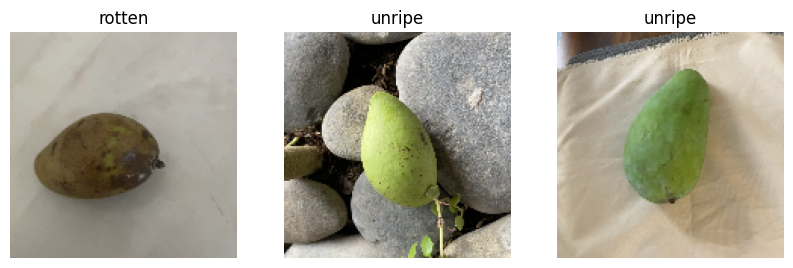

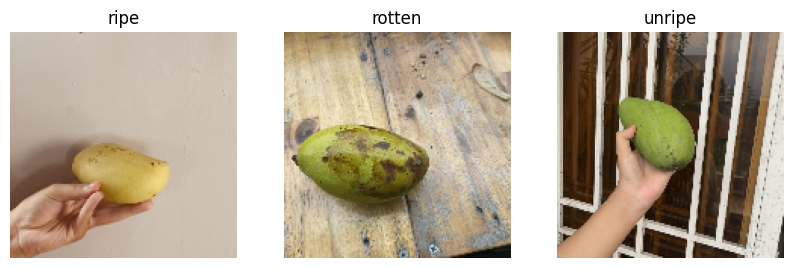

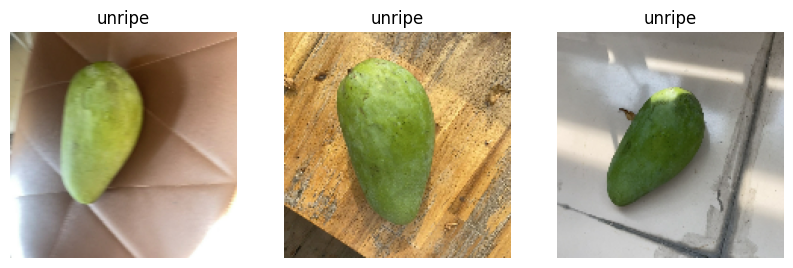

In [14]:
import matplotlib.pyplot as plt

def display_images(dataset, num_images=9):
    class_names = dataset.class_names 
    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1): 
        for i in range(num_images):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[int(labels[i])])
            plt.axis("off")
    plt.show()

display_images(train_dataset, num_images=3)
display_images(validation_dataset, num_images=3)
display_images(test_dataset, num_images=3)

In [17]:
print(f'Number of Train batches: {len(train_dataset)}')
print(f'Number of  Validation batches: {len(validation_dataset)}')
print(f'Number of  Test batches: {len(test_dataset)}')

Number of Train batches: 136
Number of  Validation batches: 34
Number of  Test batches: 44


In [23]:
input_shape = img_size + (3,)
class_numbers = len(train_dataset.class_names)
print(f'Input shape: {input_shape}')
print(f'Class number: {class_numbers}')

Input shape: (150, 150, 3)
Class number: 3


In [35]:
from tensorflow.keras import layers, models   # type: ignore

model = models.Sequential(name="trained_4")  # Added a name to the model
model.add(layers.Input(shape=input_shape))
model.add(layers.Rescaling(1./255))  # normalize the pixel values to be between 0 and 1 (devided by 255) for better performance

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(class_numbers, activation='softmax'))


In [32]:
learning_rate = 0.0001
print(f'Learning rate: {learning_rate}')

Learning rate: 0.0001


In [36]:
from tensorflow.keras import optimizers  # type: ignore

optimizer = optimizers.Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "trained_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_5 (Rescaling)         │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 34, 34, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │     1,183,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,240,323 (4.73 MB)

 Trainable params: 1,240,323 (4.73 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=5,
    restore_best_weights=True
)

In [ ]:
# Run a few dummy batches to warm up the GPU
warmup_data = next(iter(train_dataset))
_ = model.predict(warmup_data[0])  # Use predict to trigger the GPU


In [38]:


history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=50,
    callbacks=[early_stopping]
)

Epoch 1/50


I0000 00:00:1727522049.107815    6015 service.cc:146] XLA service 0x7f904c00c410 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727522049.107985    6015 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
E0000 00:00:1727522052.111820    6015 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1727522052.506783    6015 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1727522052.636794    6015 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1727522052.924079    6015 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-o

  2/136 ━━━━━━━━━━━━━━━━━━━━ 11s 88ms/step - accuracy: 0.3516 - loss: 1.3461

I0000 00:00:1727522056.613400    6015 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


135/136 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.4444 - loss: 1.0806

E0000 00:00:1727522067.385342    6016 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1727522067.657798    6016 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1727522067.905915    6016 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1727522068.176759    6016 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1727522068.464873    6016 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000

136/136 ━━━━━━━━━━━━━━━━━━━━ 31s 165ms/step - accuracy: 0.4451 - loss: 1.0795 - val_accuracy: 0.6676 - val_loss: 1.0378
Epoch 2/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 11s 83ms/step - accuracy: 0.5495 - loss: 0.9175 - val_accuracy: 0.6077 - val_loss: 0.9502
Epoch 3/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 13s 93ms/step - accuracy: 0.6902 - loss: 0.6927 - val_accuracy: 0.6869 - val_loss: 0.7554
Epoch 4/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 14s 99ms/step - accuracy: 0.8082 - loss: 0.4882 - val_accuracy: 0.8324 - val_loss: 0.5427
Epoch 5/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 11s 81ms/step - accuracy: 0.8514 - loss: 0.3830 - val_accuracy: 0.8748 - val_loss: 0.4620
Epoch 6/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 11s 83ms/step - accuracy: 0.8617 - loss: 0.3613 - val_accuracy: 0.8840 - val_loss: 0.4048
Epoch 7/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 13s 96ms/step - accuracy: 0.8862 - loss: 0.3078 - val_accuracy: 0.8564 - val_loss: 0.3777
Epoch 8/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 13s 93ms/step - accuracy: 0.8880 - loss: 0.2778 - val_accura

In [52]:
!pwd

/mnt/d/Workspace/MangoClassify


In [54]:
model_filename = f'./training/output/mango_classifier_trained4.keras'

model.save(model_filename)

print(f'Model saved to {model_filename}')

Model saved to ./training/output/mango_classifier_trained4.keras


In [39]:
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.4f}")

44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.9595 - loss: 0.2259
Test accuracy: 0.9573


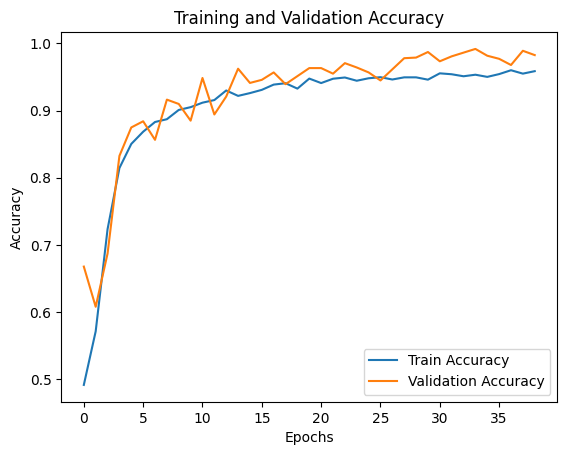

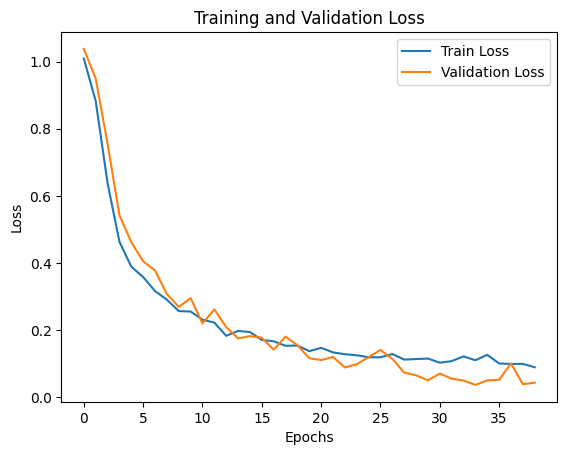

In [40]:
import matplotlib.pyplot as plt

# Plotting accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━

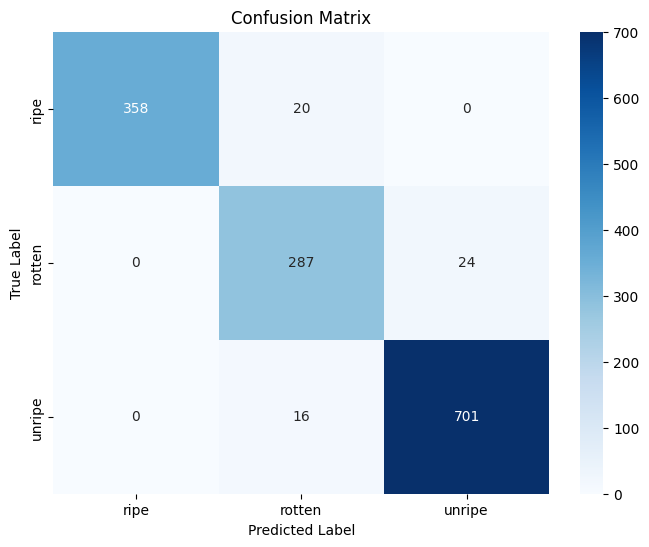

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

class_labels = ['ripe', 'rotten', 'unripe']

true_labels = []
predicted_labels = []

for images, labels in test_dataset:

    preds = model.predict(images)
    predicted_labels.extend(np.argmax(preds, axis=1)) 
    true_labels.extend(labels.numpy())
cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


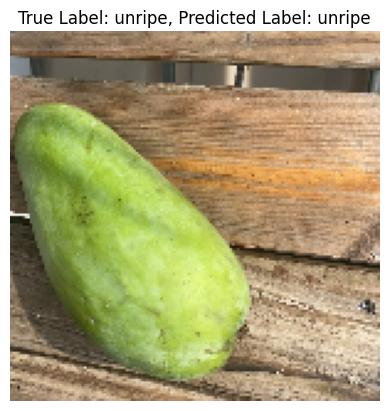

In [66]:
import numpy as np
import random
import matplotlib.pyplot as plt

for images, labels in test_dataset.take(1):
    random_index = random.randint(0, len(images) - 1)

    random_image = images[random_index]
    true_label = labels[random_index].numpy()

    prediction = model.predict(np.expand_dims(random_image, axis=0)) 
    predicted_label = np.argmax(prediction, axis=1)[0]

    plt.imshow(random_image.numpy().astype("uint8"))
    plt.title(f"True Label: {class_labels[true_label]}, Predicted Label: {class_labels[predicted_label]}")
    plt.axis("off")
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


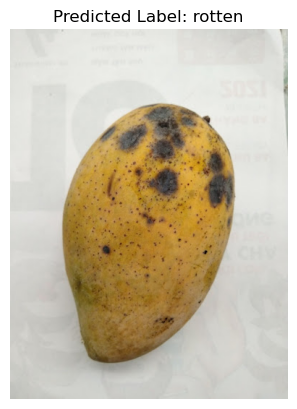

In [18]:
image = plt.imread("new_to_test/5.jpg")
resized_image = tf.image.resize(image, (256, 256))
prediction = model.predict(np.expand_dims(resized_image, axis=0)) 
predicted_label = np.argmax(prediction, axis=1)[0]

plt.imshow(image.astype("uint8"))
plt.title(f"Predicted Label: {class_labels[predicted_label]}")
plt.axis("off")
plt.show()